<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_0.4_n20.csv',
 'data_add_delta_0.4_n30.csv',
 'data_add_delta_0.4_n60.csv',
 'data_add_delta_0.4_n120.csv',
 'data_add_delta_0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-1.634542,294.379661,296.046967,-1.667306
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.285471,281.750535,282.260547,-0.510012
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,3.804145,254.580712,251.083214,3.497497
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-2.224621,233.861092,236.365695,-2.504603
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-1.499162,205.757373,207.788869,-2.031496
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-1.536469,203.488596,204.947704,-1.459108
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.517249,223.008236,222.490190,0.518046
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.688593,325.085476,325.427166,-0.341690
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-1.070688,200.729861,202.183303,-1.453442


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-1.634542,294.379661,296.046967,-1.667306
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.285471,281.750535,282.260547,-0.510012
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,3.804145,254.580712,251.083214,3.497497
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-2.224621,233.861092,236.365695,-2.504603
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-1.499162,205.757373,207.788869,-2.031496
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-1.536469,203.488596,204.947704,-1.459108
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.517249,223.008236,222.490190,0.518046
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.688593,325.085476,325.427166,-0.341690
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-1.070688,200.729861,202.183303,-1.453442


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,52.103589,73.632622,91.514808,68.763185,-1.634542,294.379661,296.046967,-1.667306
1,0.0,1.0,36.544244,88.511270,79.994570,66.985922,-0.285471,281.750535,282.260547,-0.510012
2,0.0,2.0,97.136115,55.881259,35.835687,51.923506,3.804145,254.580712,251.083214,3.497497
3,0.0,3.0,52.978892,44.066280,49.636745,79.403796,-2.224621,233.861092,236.365695,-2.504603
4,0.0,4.0,49.998445,78.301770,27.127977,41.828343,-1.499162,205.757373,207.788869,-2.031496
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,51.337755,56.981665,41.491724,45.213921,-1.536469,203.488596,204.947704,-1.459108
249996,999.0,246.0,55.256451,65.767662,37.224950,54.241923,0.517249,223.008236,222.490190,0.518046
249997,999.0,247.0,64.453034,79.702560,99.185119,72.433356,-0.688593,325.085476,325.427166,-0.341690
249998,999.0,248.0,23.613787,51.490928,39.846490,76.849344,-1.070688,200.729861,202.183303,-1.453442


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    52.103589  73.632622  91.514808  68.763185 -1.634542  294.379661   
      1.0    36.544244  88.511270  79.994570  66.985922 -0.285471  281.750535   
      2.0    97.136115  55.881259  35.835687  51.923506  3.804145  254.580712   
      3.0    52.978892  44.066280  49.636745  79.403796 -2.224621  233.861092   
      4.0    49.998445  78.301770  27.127977  41.828343 -1.499162  205.757373   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  51.337755  56.981665  41.491724  45.213921 -1.536469  203.488596   
      246.0  55.256451  65.767662  37.224950  54.241923  0.517249  223.008236   
      247.0  64.453034  79.702560  99.185119  72.433356 -0.688593  325.085476   
      248.0  23.613787  51.490928  39.846490  76.849344 -1.070688  200.729861   
      249.0  31.254839  70.499767  39.292322  56.092702  4.072339  211.211969   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    296.046967 -1.667306  
      1.0    282.260547 -0.510012  
      2.0    251.083214  3.497497  
      3.0    236.365695 -2.504603  
      4.0    207.788869 -2.031496  
...                 ...       ...  
999.0 245.0  204.947704 -1.459108  
      246.0  222.490190  0.518046  
      247.0  325.427166 -0.341690  
      248.0  202.183303 -1.453442  
      249.0  207.320463  3.891506  

[250000 rows x 8 columns]

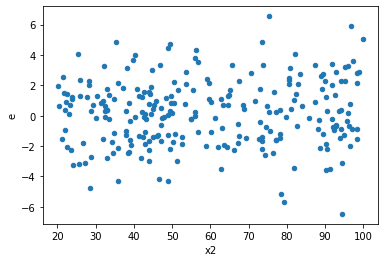

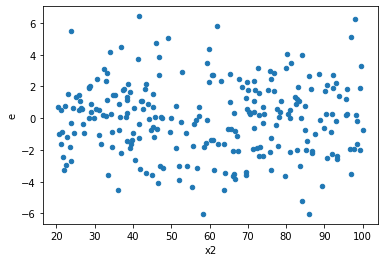

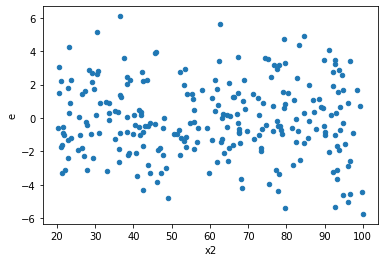

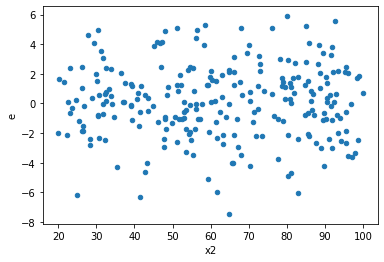

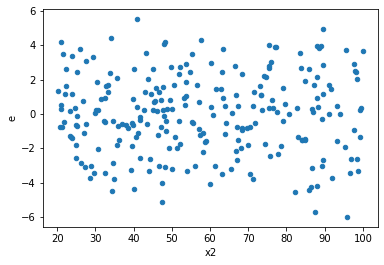

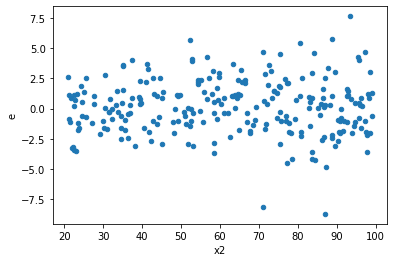

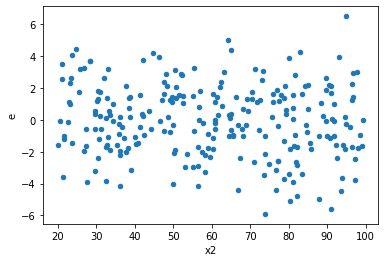

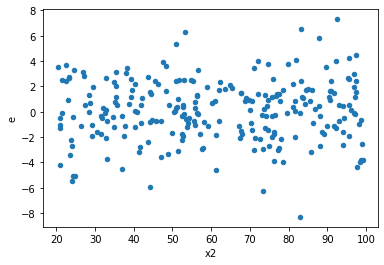

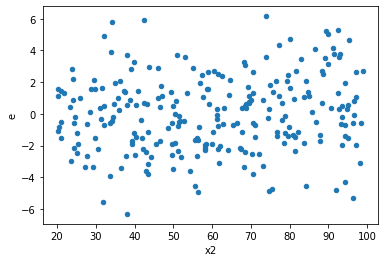

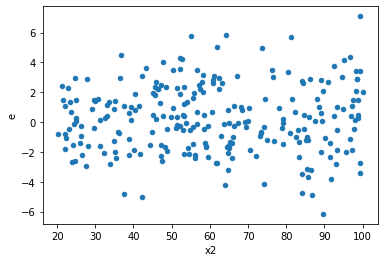

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,378.22173255424633,561.9414827267713,3.9398097141067328,5.8535571117372,1.4857461493072055,0.05381789841257412,0.9730910507937129,0.02690894920628706,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,411.7298113679446,467.114276592962,4.288852201749423,4.865773714510021,1.1345165292768242,0.5375833018912644,0.7312083490543678,0.2687916509456322,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,446.0465528370191,611.3672330306696,4.646318258718948,6.368408677402808,1.3706354844402464,0.12420950530373331,0.9378952473481333,0.06210475265186666,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,495.90280346314154,593.3251224051359,5.165654202741058,6.1804700250534985,1.1964544629746892,0.3811259913318066,0.8094370043340967,0.1905629956659033,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,461.94597156877455,577.9638807581513,4.811937203841402,6.0204570912307425,1.25115038625703,0.2740916163180671,0.8629541918409664,0.13704580815903356,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,360.3814736222372,651.0462701970151,3.7539736835649706,6.781731981218908,1.8065475554369412,0.004115010876579284,0.9979424945617104,0.002057505438289642,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,405.36063721091483,565.3485869450806,4.222506637613696,5.889047780677923,1.3946805265428912,0.10485310686170157,0.9475734465691492,0.052426553430850786,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,540.1864660749065,656.0590852385616,5.6269423549469435,6.83394880456835,1.2145048542322925,0.3427067056910402,0.8286466471544799,0.1713533528455201,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,503.8641311508464,612.2690487778259,5.248584699487983,6.377802591435686,1.2151471218627494,0.3413973149650189,0.8293013425174905,0.17069865748250945,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,378.22173255424633,561.9414827267713,3.9398097141067328,5.8535571117372,1.4857461493072055,0.05381789841257412,Reject005=1 : Homoscedasticity
1.0,96.0,96.0,411.7298113679446,467.114276592962,4.288852201749423,4.865773714510021,1.1345165292768242,0.5375833018912644,Reject005=1 : Homoscedasticity
2.0,96.0,96.0,446.0465528370191,611.3672330306696,4.646318258718948,6.368408677402808,1.3706354844402464,0.12420950530373331,Reject005=1 : Homoscedasticity
3.0,96.0,96.0,495.90280346314154,593.3251224051359,5.165654202741058,6.1804700250534985,1.1964544629746892,0.3811259913318066,Reject005=1 : Homoscedasticity
4.0,96.0,96.0,461.94597156877455,577.9638807581513,4.811937203841402,6.0204570912307425,1.25115038625703,0.2740916163180671,Reject005=1 : Homoscedasticity
5.0,96.0,96.0,360.3814736222372,651.0462701970151,3.7539736835649706,6.781731981218908,1.8065475554369412,0.004115010876579284,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,405.36063721091483,565.3485869450806,4.222506637613696,5.889047780677923,1.3946805265428912,0.10485310686170157,Reject005=1 : Homoscedasticity
7.0,96.0,96.0,540.1864660749065,656.0590852385616,5.6269423549469435,6.83394880456835,1.2145048542322925,0.3427067056910402,Reject005=1 : Homoscedasticity
8.0,96.0,96.0,503.8641311508464,612.2690487778259,5.248584699487983,6.377802591435686,1.2151471218627494,0.3413973149650189,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      632
Reject005=0 : Heteroscedasticity    368
Name: Result_test, dtype: int64